In [2]:
import tensorflow;
import pandas;
from sklearn.model_selection import train_test_split;
from tensorflow import keras;
from tensorflow.keras.models import Sequential;
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt;
from tensorflow.keras.utils import plot_model;
import requests;
import time;

In [3]:
tensorflow.config.list_physical_devices('GPU')

[]

## Data Import

In [4]:
# Loading data from pre-cleaned csv file
current_folder = "../";
# current_folder = "";
dataframe = pandas.read_csv(current_folder + "credit_card_clients.csv");

dataframe = dataframe.drop(columns = ["ID"]);

dataframe.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LABEL
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Feature Importance based on LightGBM

This time, we gotta use the top 10 the most important features according to LightGBM

PAY_0
PAY_2
PAY_AMT2
LIMIT_BAL
PAY_AMT3
BILL_AMT1
PAY_3
PAY_4
PAY_6
PAY_5

In [5]:
print("Dropping everything that other than mentioned above");

most_important_features = [
    "PAY_0",
    "PAY_2",
    "PAY_AMT2",
    "LIMIT_BAL",
    "PAY_AMT3",
    "BILL_AMT1",
    "PAY_3",
    "PAY_4",
    "PAY_6",
    "PAY_5",
    "LABEL" # Don't :)
];

columns_to_be_dropped = [];
for i in dataframe.columns:
    if i not in most_important_features:
        columns_to_be_dropped.append(i);
        print(f"Dropping feature {i} since its not \"important\"");

dataframe = dataframe.drop(columns = columns_to_be_dropped);

Dropping everything that other than mentioned above
Dropping feature SEX since its not "important"
Dropping feature EDUCATION since its not "important"
Dropping feature MARRIAGE since its not "important"
Dropping feature AGE since its not "important"
Dropping feature BILL_AMT2 since its not "important"
Dropping feature BILL_AMT3 since its not "important"
Dropping feature BILL_AMT4 since its not "important"
Dropping feature BILL_AMT5 since its not "important"
Dropping feature BILL_AMT6 since its not "important"
Dropping feature PAY_AMT1 since its not "important"
Dropping feature PAY_AMT4 since its not "important"
Dropping feature PAY_AMT5 since its not "important"
Dropping feature PAY_AMT6 since its not "important"


## Data Pre-Processing
Checkout the `main.ipynb` since I just copy-pasting the whole thing from it.

In [6]:
print("Data after cleaning: ", dataframe.shape);
print(dataframe.columns.tolist());

Data after cleaning:  (30000, 11)
['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'LABEL']


In [7]:
# Define label data
label = dataframe['LABEL'];

# Drop ID, SEX, EDUCATION, MARRIAGE, and LABEL from dataframe for features
features = dataframe.drop(columns=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', "LABEL"]);

# Typecasting all values within to int64 because ANN need to be standardized

for i in dataframe.columns:
    dataframe[i] = dataframe[i].astype(int);

# Split the data into training, validation, and testing sets
feature_train, feature_test, label_train, label_test = train_test_split(features, label, train_size = 0.7, test_size = 0.3, random_state = 42);
feature_validation, feature_test, label_validation, label_test = train_test_split(feature_test, label_test, test_size=0.5, random_state = 42);

# Scale the features
scaler = StandardScaler();
feature_train_scaled = scaler.fit_transform(feature_train);
feature_validation_scaled = scaler.fit_transform(feature_validation);
feature_test_scaled = scaler.transform(feature_test);

print("Features shape: ", features.shape);

Features shape:  (30000, 4)


In [8]:
def telegram_reporter(message):
    message = "["+ time.strftime("%Y-%m-%d %H:%M:%S") +"] " + message
    requests.request(method="POST", url="https://api.telegram.org/bot6307342709:AAEehfQrvZzQhk2hFlOW7C1JnE2hRQYLEgE/sendMessage?chat_id=-1001525528850&text=" + message, headers={}, data={});

## Fine Tunning

This code based on Tensorflow Artifical Neural Network.

(None, 512)
(None, 512)
(None, 512)
(None, 512)
(None, 256)
(None, 256)
(None, 256)
(None, 256)
(None, 256)
(None, 256)
(None, 256)
(None, 256)
(None, 128)
(None, 128)
(None, 128)
(None, 64)
(None, 64)
(None, 64)
(None, 64)
(None, 64)
(None, 64)
(None, 64)
(None, 64)
(None, 32)
(None, 32)
(None, 32)
(None, 32)
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               2560      
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 batch_normalization_7 (Batc  (None, 512)              2048      
 hNormalization)                                       

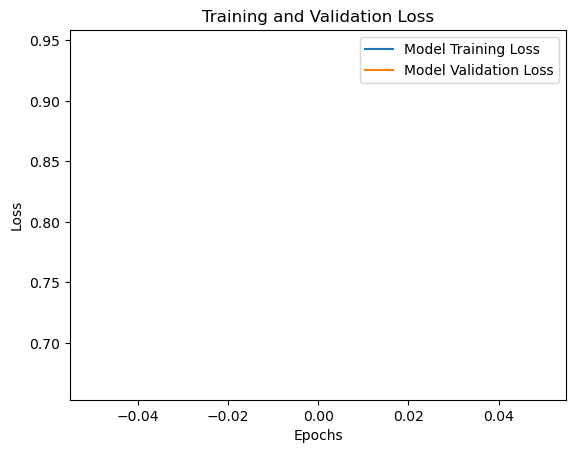

141/141 [==============================] - 1s 7ms/step - loss: 0.6727 - accuracy: 0.7789
Loss:  0.6727200150489807  Accuracy:  0.7788888812065125


In [10]:
class ANNModel:

    # Hyperparameters
    def input_layer(self):
        return keras.layers.InputLayer(input_shape = (4,)); # 11 is total features dimension

    def hidden_layer(self):
        return [
            keras.layers.Dense(512, kernel_initializer = "glorot_uniform", kernel_regularizer = tensorflow.keras.regularizers.l2(1e-4), activity_regularizer = tensorflow.keras.regularizers.l2(1e-4)),
            keras.layers.Activation("sigmoid"),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.8),

            keras.layers.Dense(256, kernel_initializer = "glorot_uniform", kernel_regularizer = tensorflow.keras.regularizers.l2(1e-4), activity_regularizer = tensorflow.keras.regularizers.l2(1e-4)),
            keras.layers.Activation("sigmoid"),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.5),

            keras.layers.Dense(256, kernel_initializer = "glorot_uniform", kernel_regularizer = tensorflow.keras.regularizers.l2(1e-4), activity_regularizer = tensorflow.keras.regularizers.l2(1e-4)),
            keras.layers.Activation("sigmoid"),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.5),

            keras.layers.Dense(128, kernel_initializer = "glorot_uniform", kernel_regularizer = tensorflow.keras.regularizers.l2(1e-4), activity_regularizer = tensorflow.keras.regularizers.l2(1e-4)),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.5),
        ];

    def shallow_hidden_layer(self):
        return [
            keras.layers.Dense(64, kernel_initializer = "glorot_uniform", kernel_regularizer = tensorflow.keras.regularizers.l2(1e-4)),
            keras.layers.Activation("sigmoid"),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.5),

            keras.layers.Dense(64, kernel_initializer = "glorot_uniform", kernel_regularizer = tensorflow.keras.regularizers.l2(1e-4)),
            keras.layers.Activation("sigmoid"),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.5),

            keras.layers.Dense(32, kernel_initializer = "glorot_uniform", kernel_regularizer = tensorflow.keras.regularizers.l2(1e-3)),
            keras.layers.Activation("sigmoid"),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.5),
        ];

    def output_layer(self):
        return keras.layers.Dense(1, kernel_initializer = "glorot_uniform", activation = "sigmoid"); # Since output is only 1 label.

    def optimizer(self):
        return keras.optimizers.Adam(learning_rate = 1e-3);

    def loss(self):
        return "binary_crossentropy";

    def metrics(self):
        return "accuracy";

    def epoch(self):
        return 1000;

        
    # Callbacks
    # Backup Model to h5 file
    def _callback_model_backup(self):
        checkpoint_path = current_folder + "/cua/" + "model_checkpoint.h5";

        return tensorflow.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            save_weights_only=True,
            save_freq='epoch'
        );

    # Early stopping after loss are not improved for some epochs
    def _callback_early_stopping(self):
        early_stopping_tolerance = 50;

        return tensorflow.keras.callbacks.EarlyStopping(
            monitor = "val_loss",
            patience = early_stopping_tolerance,
            restore_best_weights = True
        );

    # Fitting
    def fit(self):

        # Construct the model 
        model = Sequential();
        model.add(self.input_layer());

        for i in [self.hidden_layer(), self.shallow_hidden_layer()]:
            for j in i:
                model.add(j);
                print(model.output_shape)

        model.add(self.output_layer());

        # Draw the model architecture
        plot_model(model, to_file=(current_folder + "/cua/" + "model_architecture.png"), show_shapes=True)
        model.summary()

        # Compile the model pipeline
        model.compile(loss = self.loss(), optimizer = self.optimizer(), metrics=[self.metrics()]);

        telegram_reporter("Starting training model with code [202401291503] with total epoch of " + str(self.epoch()));

        # Fitting
        model_plot = model.fit(
            feature_train_scaled, 
            label_train, 
            epochs = self.epoch(), 
            validation_data = (feature_validation_scaled, label_validation), 
            callbacks = [self._callback_model_backup(), self._callback_early_stopping()] 
        );

        plt.plot(model_plot.history["loss"], label = "Model Training Loss");
        plt.plot(model_plot.history["val_loss"], label = "Model Validation Loss");
        plt.title("Training and Validation Loss");
        plt.xlabel("Epochs");
        plt.ylabel("Loss");
        plt.legend();
        plt.show();

        return model;

dojo = ANNModel();
model = dojo.fit();

loss, accuracy = model.evaluate(feature_test_scaled, label_test);
print("Loss: ", loss, " Accuracy: ", accuracy);

telegram_reporter("Finished training with Loss: " + str(loss) + " Accuracy: " + str(accuracy));